In [114]:
import pandas as pd
import numpy as np
import os
import warnings

warnings.filterwarnings('ignore')

## Feature Extraction
<p>Gettings feature that will predicts if a player was among Hall of Frame by virtue of the award they received, height, weight, etc.</p>

In [115]:
df_master = pd.read_csv('./Basketball Datasets/basketball_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5061 entries, 0 to 5060
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bioID          5061 non-null   object 
 1   useFirst       4230 non-null   object 
 2   firstName      5037 non-null   object 
 3   middleName     3245 non-null   object 
 4   lastName       5061 non-null   object 
 5   nameGiven      9 non-null      object 
 6   fullGivenName  26 non-null     object 
 7   nameSuffix     323 non-null    object 
 8   nameNick       2707 non-null   object 
 9   pos            4879 non-null   object 
 10  firstseason    5046 non-null   float64
 11  lastseason     5046 non-null   float64
 12  height         5048 non-null   float64
 13  weight         5047 non-null   float64
 14  college        4883 non-null   object 
 15  collegeOther   853 non-null    object 
 16  birthDate      5050 non-null   object 
 17  birthCity      3887 non-null   object 
 18  birthSta

In [116]:
#Selecting some features from the master dataframe
df_master_imp = df_master[['bioID', 'useFirst','firstName','middleName','lastName','height','weight','race','deathDate','firstseason','lastseason']]
df_master_imp.head()

,bioID,useFirst,firstName,middleName,lastName,height,weight,race,deathDate,firstseason,lastseason
0,abdelal01,Alaa,Alaa,NaN,Abdelnaby,82.0,240.0,B,0000-00-00,0.0,0.0
1,abdulka01,Kareem,Kareem,NaN,Abdul-Jabbar,85.0,225.0,B,0000-00-00,0.0,0.0
2,abdulma01,Mahdi,Mahdi,NaN,Abdul-Rahman,74.0,185.0,B,2011-11-18,0.0,0.0
3,abdulma02,Mahmoud,Mahmoud,NaN,Abdul-Rauf,73.0,162.0,B,0000-00-00,0.0,0.0
4,abdulta01,Tariq,Tariq,NaN,Abdul-Wahad,78.0,223.0,B,0000-00-00,0.0,0.0


In [117]:
df_master_imp.race.replace({'1':'O',np.nan:'O'}, inplace=True)

In [118]:
#creating a column for whether the player is dead or alive
df_master_imp['dead'] = np.where(df_master_imp['deathDate'] == '0000-00-00', 'No', 'Yes')

In [119]:
df_master_imp.dropna(subset=['height','weight'], inplace=True)

In [120]:
df_hof = pd.read_csv('./Basketball Datasets/basketball_hof.csv')
df_hof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      328 non-null    int64 
 1   hofID     140 non-null    object
 2   name      328 non-null    object
 3   category  328 non-null    object
dtypes: int64(1), object(3)
memory usage: 10.4+ KB


In [121]:
df_hof.dropna(subset=['hofID'], inplace=True)

In [122]:
#extracting a dataframe for only hall of fame players
new_hof_player = df_hof.query('category == "Player"')

In [123]:
new_hof_player

,year,hofID,name,category
3,1959,mikange01,George Mikan,Player
19,1960,macaued01,Ed Macauley,Player
24,1960,woodejo01,John Wooden,Player
27,1961,phillan01,Andy Phillip,Player
48,1962,thompjo01,John Thompson,Player
...,...,...,...,...
317,2012,walkech01,Chet Walker,Player
321,2012,wilkeja01,Jamaal Wilkes,Player
324,2012,danieme01,Mel Daniels,Player
326,2012,sampsra01,Ralph Sampson,Player


In [124]:
new_hof_player['hof'] = 'Yes'

In [125]:
new_hof_player

,year,hofID,name,category,hof
3,1959,mikange01,George Mikan,Player,Yes
19,1960,macaued01,Ed Macauley,Player,Yes
24,1960,woodejo01,John Wooden,Player,Yes
27,1961,phillan01,Andy Phillip,Player,Yes
48,1962,thompjo01,John Thompson,Player,Yes
...,...,...,...,...,...
317,2012,walkech01,Chet Walker,Player,Yes
321,2012,wilkeja01,Jamaal Wilkes,Player,Yes
324,2012,danieme01,Mel Daniels,Player,Yes
326,2012,sampsra01,Ralph Sampson,Player,Yes


In [126]:
df_coach_award = pd.read_csv('./Basketball Datasets/basketball_awards_players.csv')
df_coach_award.head()

,playerID,award,year,lgID,note,pos
0,feeribo01,All-NBA First Team,1946,NBA,NaN,NaN
1,fulksjo01,All-NBA First Team,1946,NBA,NaN,NaN
2,mckinho01,All-NBA First Team,1946,NBA,NaN,NaN
3,miasest01,All-NBA First Team,1946,NBA,NaN,NaN
4,zasloma01,All-NBA First Team,1946,NBA,NaN,NaN


In [127]:
#creating a dataframe for the awards received by players
df_coach_award['count'] = 1
main_df = df_coach_award.pivot_table(index='playerID', values='count', columns='award', aggfunc=np.sum, fill_value=0)
main_df.reset_index(inplace=True)
main_df

award,playerID,All-ABA First Team,All-ABA Second Team,All-Defensive First Team,All-Defensive Second Team,All-Defensive Team,All-NBA First Team,All-NBA Second Team,All-NBA Third Team,All-Rookie First Team,...,Defensive Player of the Year,Executive of the Year,Finals MVP,Finals MVP,J. Walter Kennedy Citizenship Award,Most Improved Player,Most Valuable Player,Rookie of the Year,Sixth Man of the Year,Sportsmanship Award
0,abdulka01,0,0,5,6,0,10,5,0,0,...,0,0,2,0,0,0,6,1,0,0
1,abdulma02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,adamsal01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,aingeda01,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,aldrila01,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,worthja01,0,0,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
437,yardlge01,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
438,youngje01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
439,youngth01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
new_hof_player.rename(columns={'hofID':'playerID'}, inplace=True)
main_df = pd.merge(main_df, new_hof_player[['playerID', 'hof']], how='outer')
main_df

,playerID,All-ABA First Team,All-ABA Second Team,All-Defensive First Team,All-Defensive Second Team,All-Defensive Team,All-NBA First Team,All-NBA Second Team,All-NBA Third Team,All-Rookie First Team,...,Executive of the Year,Finals MVP,Finals MVP,J. Walter Kennedy Citizenship Award,Most Improved Player,Most Valuable Player,Rookie of the Year,Sixth Man of the Year,Sportsmanship Award,hof
0,abdulka01,0.0,0.0,5.0,6.0,0.0,10.0,5.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,Yes
1,abdulma02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,adamsal01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
3,aingeda01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aldrila01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,wilkele01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
451,laniebo01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
452,murphca01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
453,sabonar01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [129]:
main_df.hof.fillna('No', inplace=True)
main_df.fillna(0, inplace=True)

In [130]:
df_master_imp.rename(columns={'bioID':'playerID'}, inplace=True)
main_df = pd.merge(main_df, df_master_imp[['playerID','height', 'weight', 'race', 'dead']], how='left')

In [131]:
main_df.dropna(inplace=True)

In [132]:
main_df = main_df[['playerID', 'All-ABA First Team', 'All-ABA Second Team',
       'All-Defensive First Team', 'All-Defensive Second Team',
       'All-Defensive Team', 'All-NBA First Team', 'All-NBA Second Team',
       'All-NBA Third Team', 'All-Rookie First Team', 'All-Rookie Second Team',
       'Comeback', 'Defensive Player of the Year', 'Executive of the Year',
       'Finals MVP', 'Finals MVP ', 'J. Walter Kennedy Citizenship Award',
       'Most Improved Player', 'Most Valuable Player', 'Rookie of the Year',
       'Sixth Man of the Year', 'Sportsmanship Award', 'height',
       'weight', 'race', 'dead', 'hof']]

In [133]:
main_df.shape

(454, 27)

## Model Training

In [134]:
def get_accuracy_score(x, y):
    y_pred = model.predict(x)
    return accuracy_score(y, y_pred)


In [135]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [136]:
main_df = pd.concat((main_df, pd.get_dummies(main_df[['race','dead']], prefix=['race', 'dead'])), axis=1)

y = main_df.hof.values
w = main_df.drop(['playerID', 'hof','race', 'dead'], axis=1)
cols = ['race_B', 'Most Improved Player', 'Most Valuable Player', 'Finals MVP', 'All-Rookie Second Team', 'All-NBA First Team',
 'All-NBA Second Team', 'All-Rookie First Team']
x = w[cols]

In [137]:
dict = {'Most Improved Player':'Most_Improved_Player', 'Most Valuable Player':'Most_Valuable_Player', 'Finals MVP':'Finals_MVP', 'All-Rookie Second Team':'All_Rookie_Second_Team', 'All-NBA First Team':'All_NBA_First_Team',
 'All-NBA Second Team':'All_NBA_Second_Team', 'All-Rookie First Team':'All_Rookie_First_Team'}

x.rename(columns=dict,inplace=True)


In [147]:
x.columns

Index(['race_B', 'Most_Improved_Player', 'Most_Valuable_Player', 'Finals_MVP',
       'All_Rookie_Second_Team', 'All_NBA_First_Team', 'All_NBA_Second_Team',
       'All_Rookie_First_Team'],
      dtype='object')

In [138]:

from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline


# Feature Selection using RFE

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’

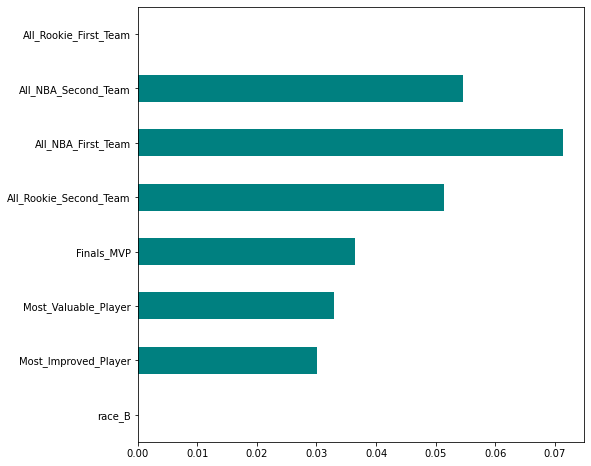

In [139]:
# Calculating scores
importances = mutual_info_classif(x, y)

# Plotting the ranks
plt.rcParams['figure.figsize'] = [8, 8]

feat_importances = pd.Series(importances, x.columns[0:len(x.columns)])
feat_importances.plot(kind='barh', color='teal')
plt.show()

#['race_B', 'Most Improved Player', 'Most Valuable Player', 'Finals MVP', 'All-Rookie Second Team', 'All-NBA First Team',
 #      'All-NBA Second Team', 'All-Rookie First Team']

In [140]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x.iloc[:,3:],y, test_size=0.25, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,y_train_full, test_size=0.35, random_state=0)

In [141]:
model = RandomForestClassifier(random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [142]:
get_accuracy_score(x_val, y_val)

0.7647058823529411

In [143]:
get_accuracy_score(x_test, y_test)

0.868421052631579

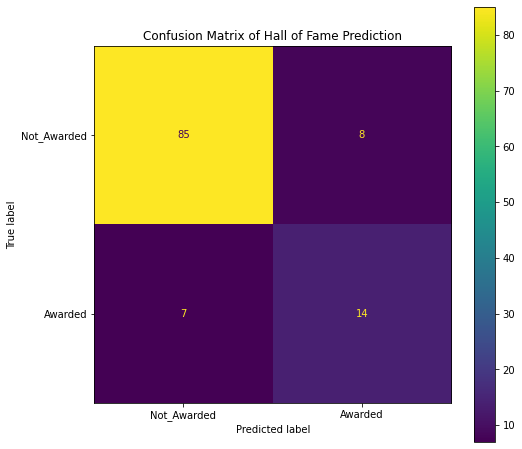

In [145]:
matrix = confusion_matrix(y_test, model.predict(x_test))
cm_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Not_Awarded', 'Awarded'])
cm_display.plot()
plt.title('Confusion Matrix of Hall of Fame Prediction')
plt.show()

# Model Deployment

In [146]:
# Saving the model

import pickle 

pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()